In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [19]:
df = pd.read_csv('/Users/ambabu/Documents/PersonalDocuments/code-samples/py-data-science/ML/2_linear_reg_multivariate/homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [4]:
df1 = df.dropna(how='any')
df1

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


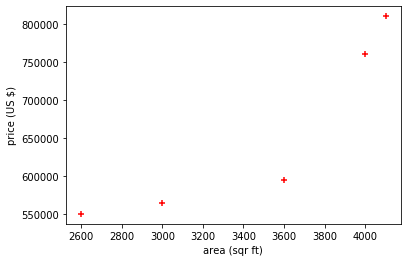

In [9]:
%matplotlib inline
plt.xlabel('area (sqr ft)')
plt.ylabel('price (US $)')
plt.scatter(df1.area, df1.price, color='red', marker='+')

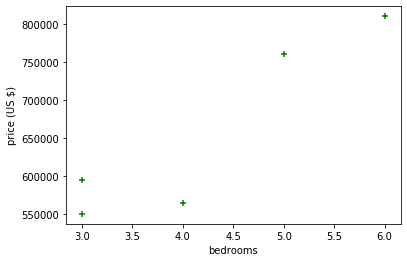

In [11]:
%matplotlib inline
plt.xlabel('bedrooms')
plt.ylabel('price (US $)')
plt.scatter(df1.bedrooms, df1.price, color='green', marker='+')

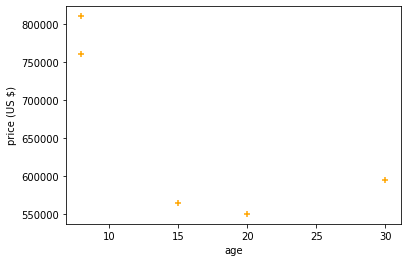

In [14]:
%matplotlib inline
plt.xlabel('age')
plt.ylabel('price (US $)')
plt.scatter(df1.age, df1.price, color='orange', marker='+')

In [20]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [22]:
model = linear_model.LinearRegression()
model.fit(df[['area', 'bedrooms', 'age']], df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
model.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [26]:
model.predict([[3000, 3, 40]])

array([498408.25158031])

In [27]:
hiring_df = pd.read_csv('/Users/ambabu/Documents/PersonalDocuments/code-samples/py-data-science/ML/2_linear_reg_multivariate/Exercise/hiring.csv')
hiring_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [29]:
hiring_df.experience = hiring_df.experience.fillna('zero')
hiring_df['test_score(out of 10)'] = hiring_df['test_score(out of 10)'].fillna(hiring_df['test_score(out of 10)'].median()                                                                              )

In [30]:
hiring_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [33]:
from word2number import w2n
hiring_df.experience = hiring_df.experience.map(lambda exp: w2n.word_to_num(exp))

ValueError: Type of input is not string! Please enter a valid number word (eg. 'two million twenty three thousand and forty nine')

In [34]:
hiring_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [36]:
hiring_model = linear_model.LinearRegression()
hiring_model.fit(hiring_df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], hiring_df['salary($)'])



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
hiring_model.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [38]:
hiring_model.predict([[2, 9, 6]])

array([53205.96797671])

In [39]:
hiring_model.predict([[12, 10, 10]])

array([92002.18340611])